age	 salary
49 	 50000.00
44 	 50000.00
43 	 50000.00
49 	 40000.00
38 	 40000.00
41 	 30000.00
50 	 30000.00

Formula: 11.2612612613 * x + 40923.4234234 = y
Predicted y-values: [ 41475.22522523  41418.91891892  41407.65765766  41475.22522523
  41351.35135135  41385.13513514  41486.48648649]
Prediction error: [  8524.77477477   8581.08108108   8592.34234234  -1475.22522523
  -1351.35135135 -11385.13513514 -11486.48648649]
Residual error: 9855.94438091


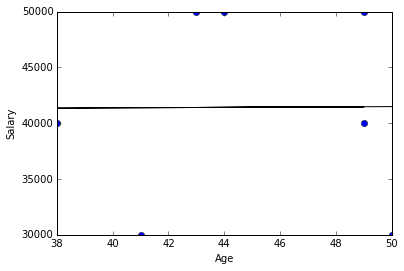

In [11]:
# Ramon Lawrence - 99999999
%matplotlib inline 

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

try:
    # Make a connection to the database
    cnx = mysql.connector.connect(user='rlawrenc', password='test', host='cosc304.ok.ubc.ca', database='WorksOn')
    
    # Create a cursor
    cursor = cnx.cursor()
    
    # Execute SQL query
    query = ("SELECT timestampdiff(YEAR,bdate, CURDATE()) as age, salary FROM emp WHERE salary > 20000 AND salary < 55000 ORDER BY salary DESC")             
    cursor.execute(query)
    
    # Print results and put data in lists for analysis
    print("age\t salary")
    ageList = []
    salaryList = []
    
    for (age, salary) in cursor:
        ageList.append(age)
        salaryList.append(float(salary))
        print(age,"\t",salary)
        
    # Close database cursor
    cursor.close()
    
    # Convert lists to arrays for linear regression
    x = np.array(ageList)
    y = np.array(salaryList)
    
    # Compute linear regression
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

    # Output information on regression
    print("\nFormula:", slope,"* x +",intercept,"= y")
    predict_y = intercept + slope * x
    print("Predicted y-values:",predict_y)
    pred_error = y - predict_y
    print("Prediction error:",pred_error)
    degr_freedom = len(x) - 2
    residual_std_error = np.sqrt(np.sum(pred_error**2) / degr_freedom)
    print("Residual error:",residual_std_error)
    
    # Plot regression results
    plt.plot(x, y, 'o')
    plt.plot(x, predict_y, 'k-')
    plt.xlabel("Age")
    plt.ylabel("Salary")
    plt.show()

except mysql.connector.Error as err:  
    print(err)
finally:
    cnx.close()